In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# (b)

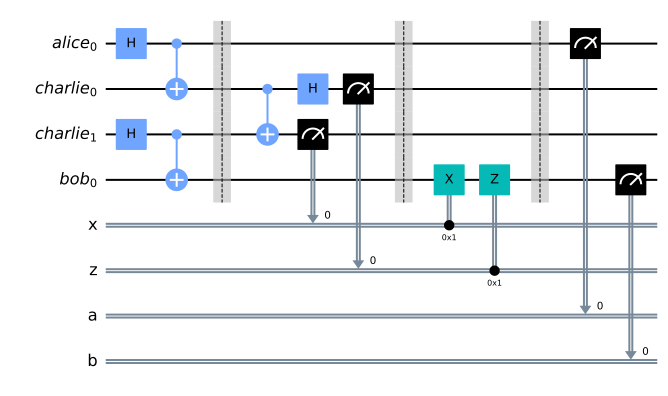

In [2]:
q_a = QuantumRegister(1, name="alice")
q_c = QuantumRegister(2, name="charlie")
q_b = QuantumRegister(1, name="bob")
c_x = ClassicalRegister(1, name="x")
c_z = ClassicalRegister(1, name="z")
c_a = ClassicalRegister(1, name="a")
c_b = ClassicalRegister(1, name="b")
qc = QuantumCircuit(q_a, q_c, q_b, c_x, c_z, c_a, c_b)

qc.h(0)
qc.h(2)
qc.cx(0, 1)
qc.cx(2, 3)

qc.barrier()

qc.cx(1, 2)
qc.h(1)
qc.measure([1, 2], [1, 0])

qc.barrier()

qc.x(3).c_if(c_x, 1)
qc.z(3).c_if(c_z, 1)

qc.barrier()

qc.measure([0, 3], [2, 3])

qc.draw()

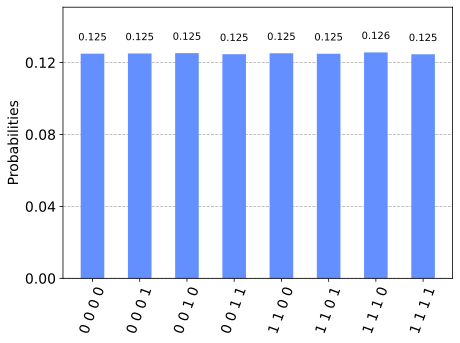

In [3]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### By measuring multiple times, it's clear that what Alice gets is exactly what Bob gets. The Entanglement Swapping is a success!